# Numerical integration with the midpoint and trapezoidal methods
In this notebook we look at two simple methods for integrating

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

We want to solve definite integrals of the form $$ I = \int^b_a f(x)\,dx$$

We each method we will look at we break the integral up into $N$ strips of width $\Delta x$. Each strip spans $x_i$ to $x_{i+1} = x_i + \Delta x$, with $x_0 = a$ and $x_N = b$. For each strip we approximate the integral with $I_i$ and our numerical result for the entire integral is given by

$$I_{num} = \sum_{i=0}^{N-1} I_i$$

## Midpoint integration

Let's first look at the midpoint method which breaks the integral into rectangular strips with height found at the middle of the strip. For the mid point method the area of each strip is given by 

$$I_i = \Delta x f(x_i + \Delta x/2)$$


In [2]:
def MidpointIntegrate(f, a, b, n, plotMethod=False):
    dx = (b-a)/n
    xi = a
    i = 0
    area = 0
    while i < n:
        if(plotMethod):
            rectangle = plt.Rectangle((xi, 0), dx, f(xi+dx/2), fc='None',ec="red")
            plt.gca().add_patch(rectangle)
            
        # The next line is the midpoint rule    
        area += dx * f(xi+dx/2)
        xi += dx
        i += 1
    
    if(plotMethod):
        x = np.linspace(a,b,100)
        y = f(x)
        plt.plot(x,y);
    return area

Let's consider the function $f(x) = x^2 +2$. The integral of this is $$I = \left[\frac{1}{3}x^3 + 2x\right]^b_a$$

If we take $a=-4,b=4$ then $I = 176/3 \simeq 58.66666666$.

In [3]:
def f(x):
    return x**2 + 2

58.24000000000001
0.4266666665999921


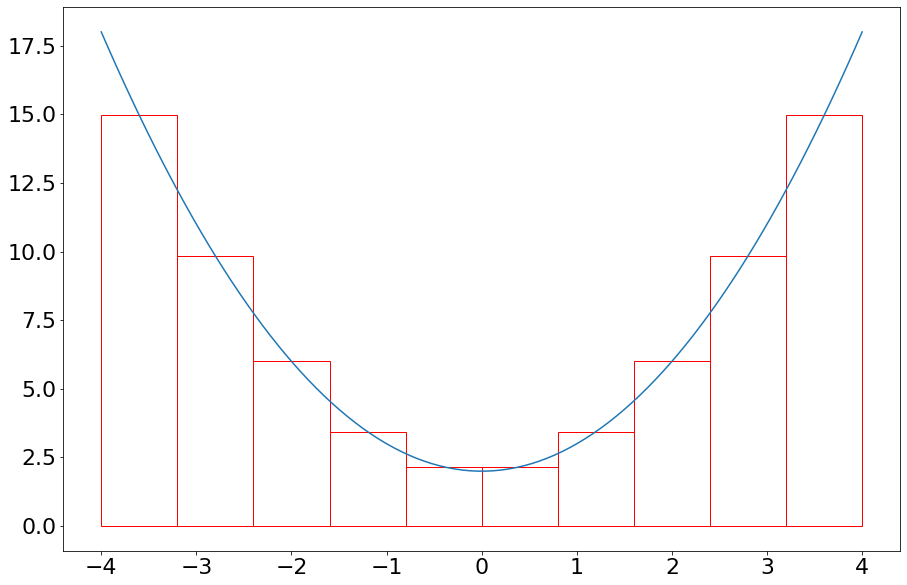

In [4]:
num = MidpointIntegrate(f, -4, 4, 10, True)
print(num)
print(np.abs(num - 58.6666666666))

## Trapezoidal integration

Visually, the midpoint method does not look like it is that accurate. Let's now look at the trapezoidal method. The formula for trapezoidal integration is given by:

$$ I_i = \frac{\Delta x}{2} \left[ f(x_i) + f(x_{i+1}) \right] $$

In [5]:
def TrapezoidalIntegrate(f, a, b, n, plotMethod=False):
    dx = (b-a)/n
    xi = a
    i = 0
    area = 0
    while i < n:
        if(plotMethod):
            arr1 = [xi, xi+dx];
            arr2 = [f(xi), f(xi+dx)]
            
            trapezoid = plt.Polygon([(xi, 0), *zip(arr1, arr2), (xi+dx, 0)], fc="None", ec="red")
            plt.gca().add_patch(trapezoid)
            
        # The next line is the trapezoidal rule   
        area += dx/2 * (f(xi) + f(xi+dx))
        xi += dx
        i += 1
    
    if(plotMethod):
        x = np.linspace(a,b,100)
        y = f(x)
        plt.plot(x,y);
    return area

0.853333333400009


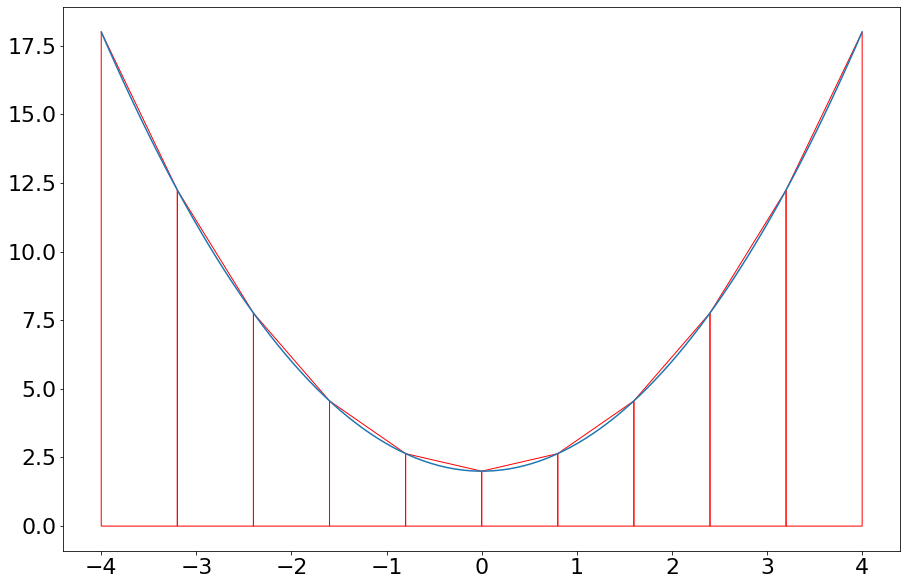

In [6]:
num = TrapezoidalIntegrate(f, -4, 4, 10, True)
print(num - 58.6666666666)

This looks like it will be much more accurate.

## Convergence of the methods

Next we'll look at the rate of convergence of the midpoint and tranpezoidal methods. 


In [7]:
I = 58.666666666
imax = 10;

errMidpoint = np.empty((imax,2));
errTrap = np.empty((imax,2))

i = 0
N = 10
while i < imax:
    errMidpoint[i,0] = N
    errMidpoint[i,1] = np.abs(MidpointIntegrate(f,-4,4, N, False) - I)
    
    errTrap[i, 0] = N
    errTrap[i, 1] = np.abs(TrapezoidalIntegrate(f,-4,4, N, False) - I)
    
    N *= 2
    i += 1

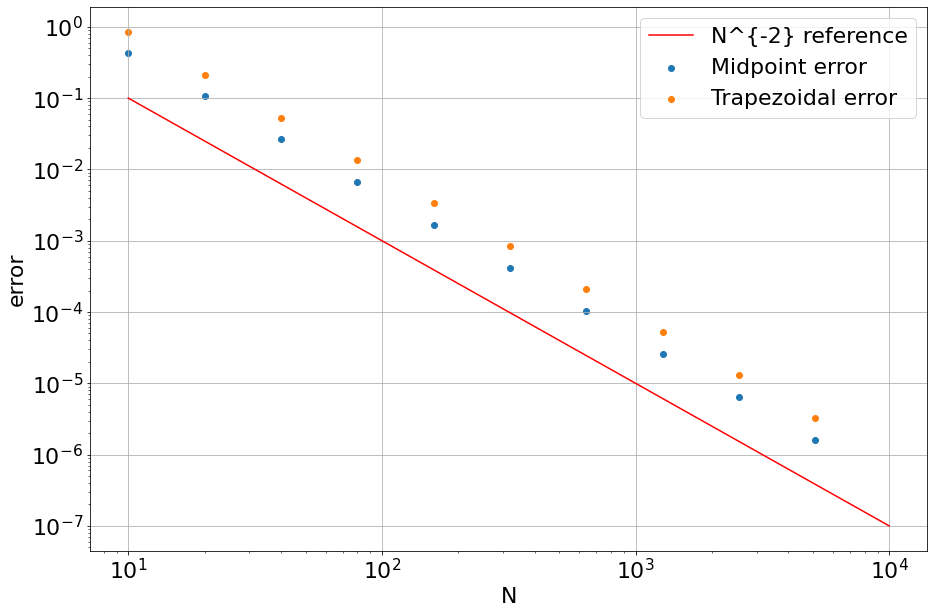

In [8]:
x = np.linspace(10,1e4)
N2ref = 10*x**-2


plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.scatter(errMidpoint[:,0], errMidpoint[:,1]);
plt.scatter(errTrap[:,0], errTrap[:,1]);
plt.plot(x,N2ref, color='red')
plt.legend(['N^{-2} reference','Midpoint error', 'Trapezoidal error']);

Despite looking like a more accurate method, the trapezoidal error is worse than the midpoint error. Both converge at the same rate but, as we saw in the lectures, the error in the trapezoidal method is larger.

The trapezoidal method is thus much worse, as it requires two functions evaluations to rearch a worse accuracy than them midpoint method which requires only on function evaluation.